# Размер случайного леса.

Случайный лес — это модель классификации, объединяющая некоторое количество решающих деревьев в одну композицию, за счет чего улучшается их качество работы и обобщающая способность. Деревья строятся независимо друг от друга. Чтобы они отличались друг от друга, обучение проводится не на всей обучающей выборке, а на ее случайном подмножестве. Также, для дальнейшего уменьшения схожести деревьев, оптимальный признак для разбиения выбирается не из всех возможных признаков, а лишь из их случайного подмножества. Прогнозы, выданные деревьями, объединяются в один ответ путем усреднения.

Особенность случайного леса заключается в том, что он не переобучается по мере увеличения количества деревьев в композиции. Это достигается за счет того, что деревья не зависят друг от друга, и поэтому добавление нового дерева в композицию не усложняет модель, а лишь понижает уровень шума в прогнозах.

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style('whitegrid')

## 1. Загрузите данные из файла abalone.csv. 

Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [4]:
df = pd.read_csv('data/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 2. Преобразуйте признак Sex в числовой.

Преобразуйте признак Sex в числовой: 
- F - в -1,
- I - в 0, 
- M - в 1. 

In [5]:
df["Sex"].replace({"F": -1, "I": 0, "M": 1}, inplace=True)
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 3. Разделите содержимое файлов на признаки и целевую переменную.

В последнем столбце записана целевая переменная, в остальных — признаки.

In [6]:
X = df.drop(['Rings'], axis = 1)
y = df['Rings']

## 4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) 

C различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). 

Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold.  

В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [8]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)

In [10]:
scores = []
for n in range(1, 51):
    model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    score = cross_val_score(model, X, y, cv=cv, scoring="r2").mean()
    scores.append(score)

## 5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. 

Это количество и будет ответом на задание.

In [14]:
for n, score in enumerate(scores):
    if score > 0.52:
        print(n, score)
        break

20 0.520529096463528


In [16]:
outFile_1 = open('01_Zadanie.txt', 'w', encoding='utf8')

print(n+1, file=outFile_1)
outFile_1.close()

Ответ 22 так как разные версии библиотеки с тренажером

## 6. Обратите внимание на изменение качества по мере роста числа деревьев.

Text(0.5, 1.0, 'Распределение качества модели')

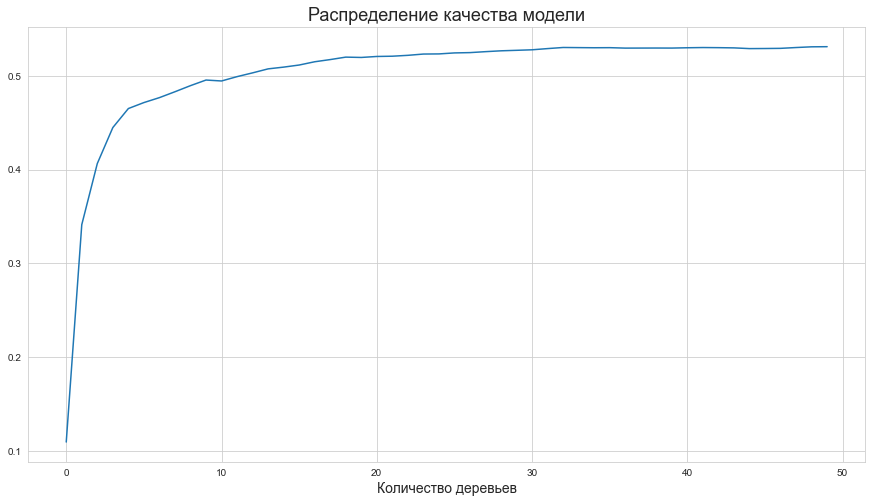

In [33]:
plt.figure(figsize=(15,8))

pd.Series(scores).plot()

plt.xlabel('Количество деревьев', size=14)
plt.title('Распределение качества модели', size=18)